## Yolo 적용을 위한 파이썬과 딥러닝 이해
# 이미지 증대 (augentation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### cifar-10 데이터 불러오기
- http://www.cs.toronto.edu/~kriz/cifar.html
- cifar-10-python.tar.gz

In [2]:
import pickle

X_train = None
y_train = []

for i in range(1,6):
    f = open('../프로그래밍/keras_new/cifar10/data_batch_'+str(i), 'rb')
    dict = pickle.load(f, encoding='bytes') # [b'batch_label', b'labels', b'data', b'filenames']
    f.close()
    
    X_now = dict[b'data']
    if i==1:
        X_train = X_now
    else:
        X_train = np.r_[X_train, X_now]
        
    y_train += dict[b'labels']

In [3]:
X_train.shape, len(y_train)

((50000, 3072), 50000)

- 3072 개의 값은 R채널, G채널, B채널 순으로 되어 있다. 즉 (3,32,32) 형태이다.
- np.moveaxis() 를 이용해 1번 축을 마지막으로 보내야 한다.

In [4]:
X_train = np.moveaxis(X_train.reshape(-1,3,32,32), 1, -1)

Text(0.5, 1.0, '6')

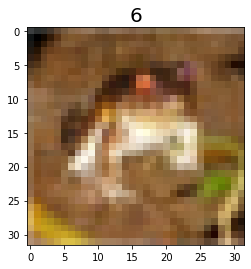

In [5]:
plt.imshow(X_train[0])
plt.title(y_train[0], fontsize=20)

In [6]:
X_train[0].dtype, X_train[0].max()

(dtype('uint8'), 255)

In [7]:
y_train[:10]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

### 테스트 데이터 불러오기

In [8]:
import pickle

f = open('../프로그래밍/keras_new/cifar10/test_batch', 'rb')
dict = pickle.load(f, encoding='bytes') # [b'batch_label', b'labels', b'data', b'filenames']
f.close()

X_test = dict[b'data']
y_test = dict[b'labels']

In [9]:
X_test.shape, len(y_test)

((10000, 3072), 10000)

In [10]:
X_test = np.moveaxis(X_test.reshape(-1,3,32,32), 1, -1)

### 사진 레이블 알아내기

In [11]:
f = open('../프로그래밍/keras_new/cifar10/batches.meta', 'rb')
dict = pickle.load(f, encoding='bytes') # [b'batch_label', b'labels', b'data', b'filenames']
f.close()

dict.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [12]:
dict[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [13]:
labels = [b.decode() for b in dict[b'label_names']]
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### 데이터 정리
- X_train, y_train
- X_test, y_test
- labels

In [14]:
from keras.utils import np_utils

Using TensorFlow backend.


In [15]:
X_train = X_train/255.

In [16]:
y_train = np_utils.to_categorical(y_train, 10)

In [17]:
X_test = X_test/255.

In [18]:
y_test = np_utils.to_categorical(y_test, 10)

In [19]:
labels = np.array(labels)

- 데이터 확인

In [20]:
X_train.shape, X_train[0].max()

((50000, 32, 32, 3), 1.0)

In [21]:
y_train.shape

(50000, 10)

In [22]:
X_test.shape, X_test[0].max()

((10000, 32, 32, 3), 1.0)

In [23]:
y_test.shape

(10000, 10)

In [24]:
labels.shape

(10,)

### 이미지 증대

In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [26]:
images = X_train[:10]
images.shape

(10, 32, 32, 3)

In [27]:
n = 0
images_aug = []

for x in datagen.flow(images, batch_size=2): # shuffle=True
    print(x.shape)
    images_aug.append(x[0]) # x -> (2,32,32,3)
    images_aug.append(x[1])
    
    n += 1
    if n>=10: break
        
display(len(images_aug), images_aug[0].shape)

(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)


20

(32, 32, 3)

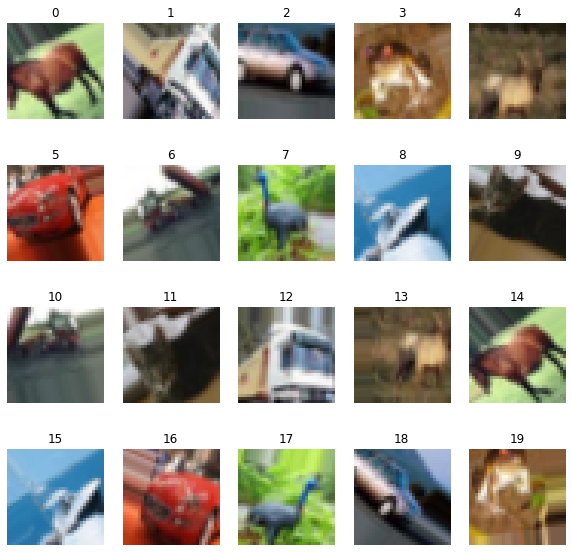

In [28]:
plt.figure(figsize=[10,10])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images_aug[i])
    plt.axis('off')
    plt.title(i)

### Keras 적용

In [29]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

In [30]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

W0801 20:08:27.595932   932 deprecation_wrapper.py:119] From C:\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 20:08:27.875929   932 deprecation_wrapper.py:119] From C:\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 20:08:27.916929   932 deprecation_wrapper.py:119] From C:\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 20:08:28.126924   932 deprecation_wrapper.py:119] From C:\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0801 20:08:28.141929   932 deprecation_wrapper.py:119] From C:\Anaconda3\envs\kera

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

W0801 20:13:23.679289   932 deprecation_wrapper.py:119] From C:\Anaconda3\envs\keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 20:13:23.784289   932 deprecation_wrapper.py:119] From C:\Anaconda3\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [35]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),
                              steps_per_epoch=500,
                              epochs=1,
                              validation_data=(X_test, y_test))

W0801 20:13:58.851857   932 deprecation.py:323] From C:\Anaconda3\envs\keras\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
500/500 [==============================] - 1356s 3s/step - loss: 1.9250 - acc: 0.2957 - val_loss: 1.5258 - val_acc: 0.4413


### 모델 저장하고 불러오기

In [ ]:
open('cifar10_architecture_3.json', 'w').write(model.to_json()) # keras.models.model_from_json()
model.save_weights('cifar10_weights_3.h5', overwrite=True) # model.load_weights()
# model.save() => keras.models.load_model()

- 구조와 가중치 따로 저장 (https://3months.tistory.com/150)

```
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")
```

- 전체 모델 저장

```
from keras.models import load_model
    
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model = load_model('my_model.h5')
```